Netflix Titles EDA Notebook Structure
1️⃣ Import Libraries & Load Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("Netflix_Titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


insights-The dataset shows a mix of movies and TV shows from different countries, genres, and age ratings, highlighting Netflix’s global catalog and diverse content offerings, with some missing metadata fields.

2️⃣ Dataset Info & Basic Checks

In [7]:

df.info()
df.describe(include='all')
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

insghts-The Netflix dataset has 8,807 entries with rich metadata, though key fields like director, cast, and country have missing values.

3️⃣ Missing Values & Duplicates

In [8]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

4️⃣ Data Cleaning

In [8]:
# Drop duplicates
df = df.drop_duplicates()



7️⃣ Univariate Analysis - Numerical Columns

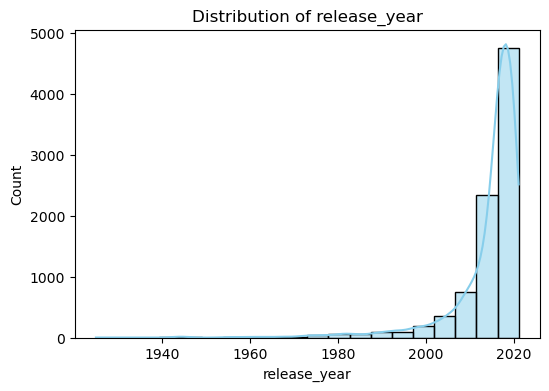

In [4]:
num_cols = ['release_year']

# Set Matplotlib font to default or to a commonly available one
plt.rcParams['font.family'] = 'DejaVu Sans'  # Optional

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

insight-The distribution of release years shows that most titles in the Netflix dataset were released after 2000, with a huge spike in releases after 2010, indicating Netflix's rapid growth in recent years and increased focus on adding newer content

8️⃣ Bivariate Analysis - Boxplots

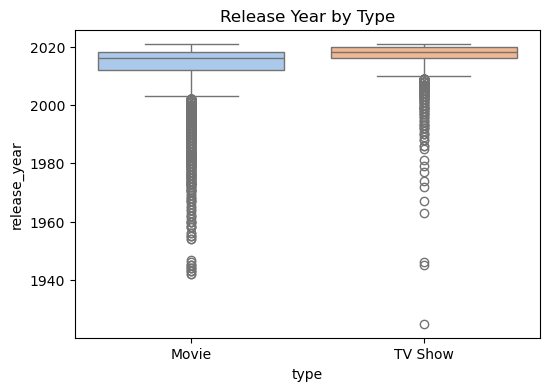

In [5]:

plt.figure(figsize=(6,4))
sns.boxplot(x='type', y='release_year', data=df, hue='type', palette='pastel', legend=False)
plt.title("Release Year by Type")
plt.show()


insight-The boxplot shows that both Movies and TV Shows in the Netflix dataset are predominantly recent releases, with most titles concentrated after 2000, and TV Shows generally being even newer than Movies; there are a few older titles in both categories, visible as outliers.

8️⃣ Correlation Heatmap

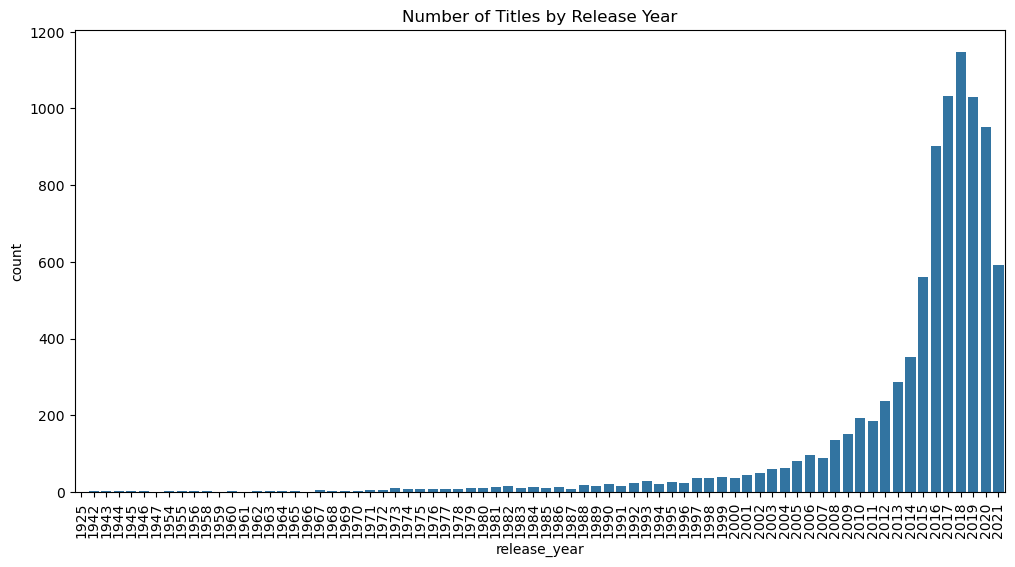

In [15]:

plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=df, order=sorted(df['release_year'].unique()))
plt.title('Number of Titles by Release Year')
plt.xticks(rotation=90)
plt.show()

insight-The countplot shows that most Netflix titles were released after 2010, with a sharp rise between 2015 and 2020, indicating rapid content growth and acquisitions in recent years.

9️⃣ Save Cleaned Dataset

In [10]:
df.to_csv("Netflix_Titles_cleaned.csv", index=False)
print("✅ Cleaned dataset saved successfully as 'Netflix_Titles_cleaned.csv'")


✅ Cleaned dataset saved successfully as 'Netflix_Titles_cleaned.csv'
